# Heart Disease Classsification

Bu projede kalp hastalıkları tahmini için classification çalışması yapılmıştır.

<img src="heart.webp" width="100%"></img>

### Data Dictionary

### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

### Exploratory Data Analysis

In [3]:
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<AxesSubplot: >

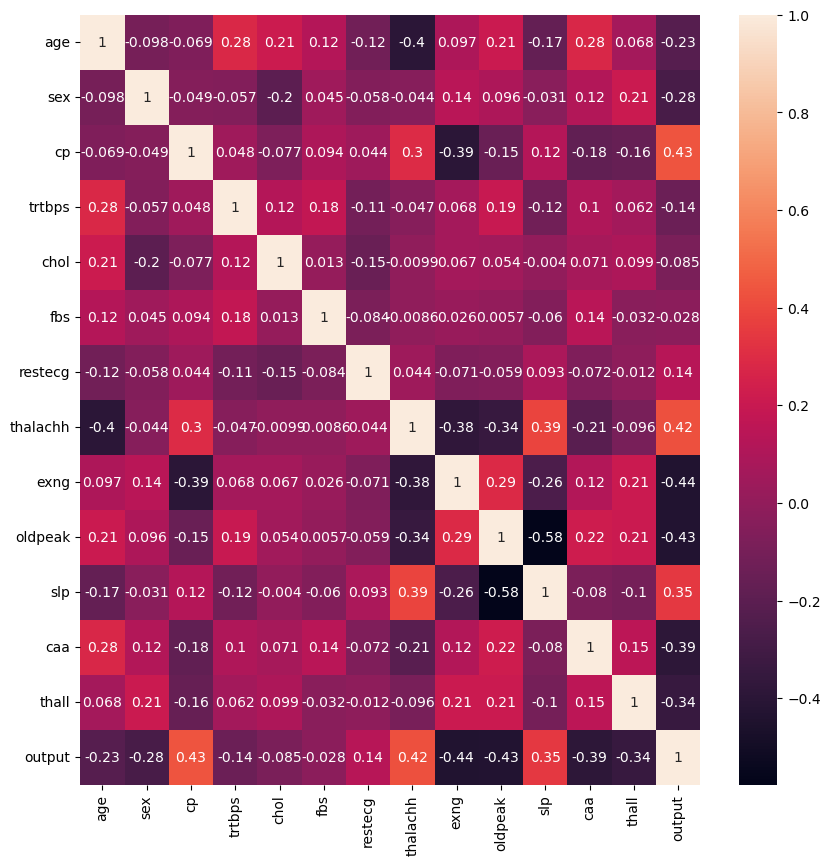

In [5]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)

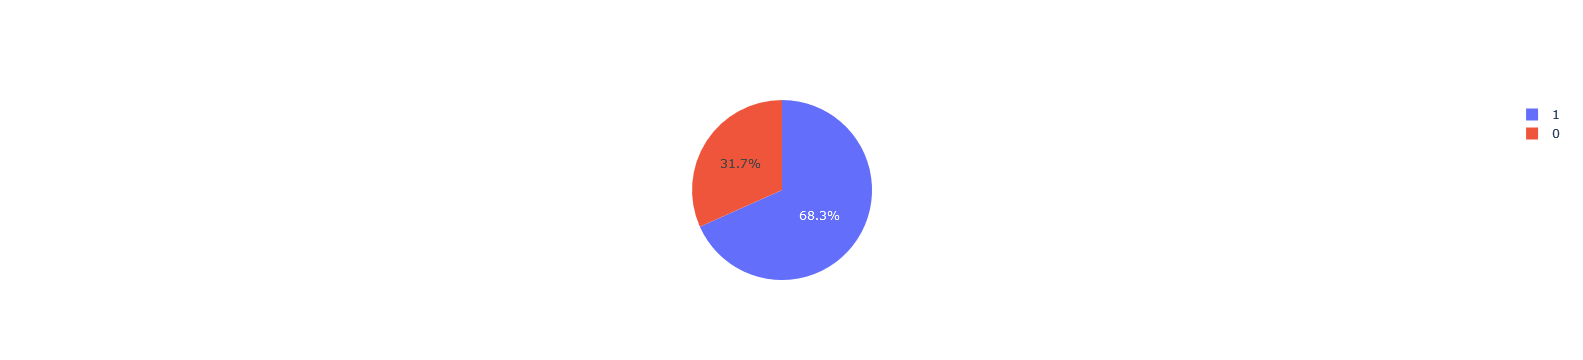

In [6]:
sex = df.sex.value_counts()
fig = go.Figure(data=[go.Pie(labels=sex.index, values=sex.values)])
fig.show()

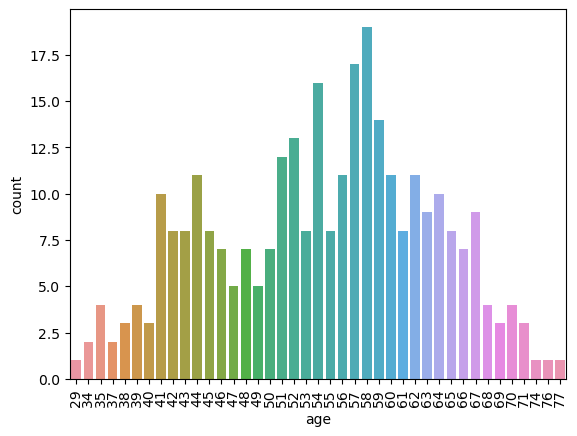

In [7]:
sns.countplot(data=df, x='age')
plt.xticks(rotation=90);

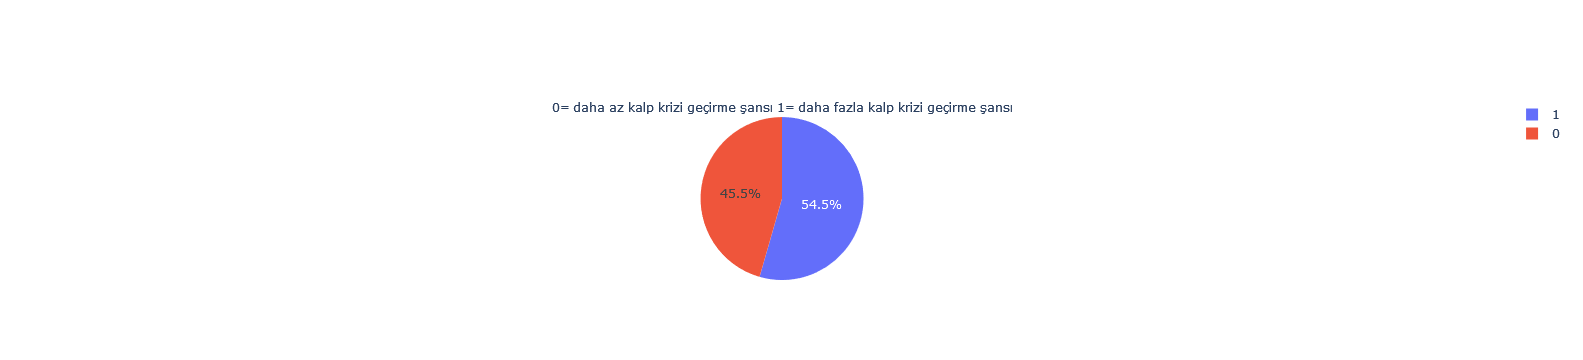

In [9]:
output = df.output.value_counts()
fig = go.Figure(data=[go.Pie(labels=output.index, values=output.values,title="0= daha az kalp krizi geçirme şansı 1= daha fazla kalp krizi geçirme şansı")])
fig.show()

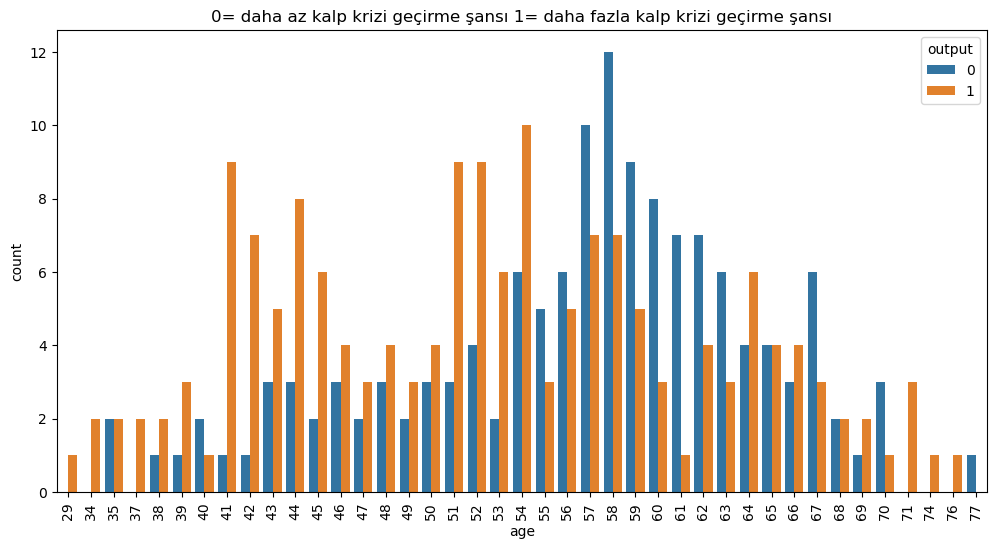

In [11]:
plt.figure(figsize=(12,6))
plt.title("0= daha az kalp krizi geçirme şansı 1= daha fazla kalp krizi geçirme şansı")
sns.countplot(x=df['age'], hue=df.output);
plt.xticks(rotation=90); 

<AxesSubplot: xlabel='trtbps', ylabel='Density'>

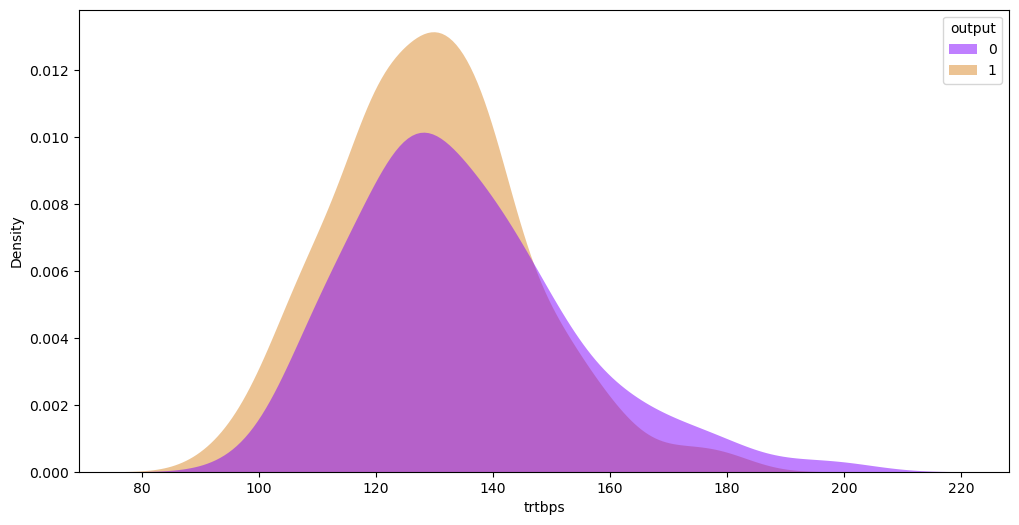

In [14]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='trtbps',hue="output", fill=True,palette=["#8000ff","#da8829"], alpha=.5, linewidth=0)

Sex= 1 olanların kalp krizi geçirme olasılığı daha fazladır.

<AxesSubplot: xlabel='thalachh', ylabel='Density'>

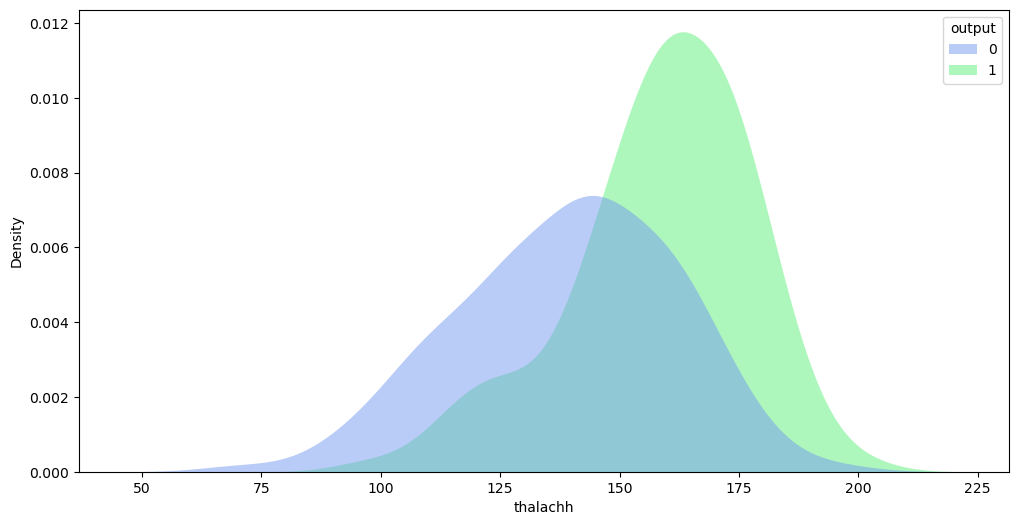

In [15]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df, x='thalachh',hue="output", fill=True,palette=["#759AF0","#5DF07C"], alpha=.5, linewidth=0)

<AxesSubplot: xlabel='cp', ylabel='count'>

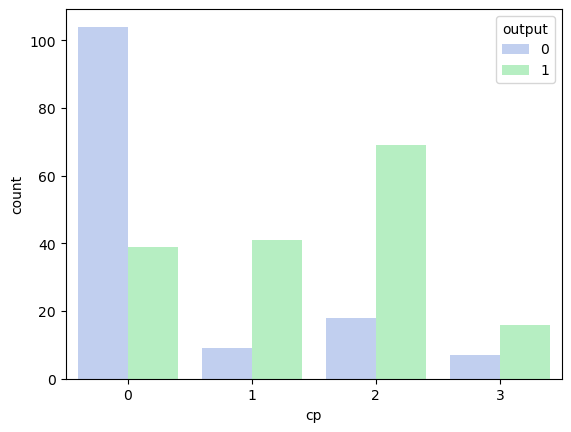

In [17]:
sns.countplot(data=df, x='cp',hue="output", fill=True,palette=["#759AF0","#5DF07C"], alpha=.5, linewidth=0)

Anjinal olmayan göğüs ağrısı olan, yani cp = 2 olan kişilerin kalp krizi geçirme olasılığı daha yüksektir.

### Model Training

In [24]:
df = pd.get_dummies(df, drop_first=True)

In [25]:
y= df['output']
x= df.drop('output',axis=1)

##### Classification

In [21]:
!pip install xgboost

In [23]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    from sklearn.model_selection import train_test_split
       
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    g=GaussianNB()
    b=BernoulliNB()
    KN=KNeighborsClassifier()
    SVC=SVC() 
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGB=XGBClassifier()
    
    algos=[g,b,KN,SVC,D,R,Log,XGB]
    algo_names=['GaussianNB','BernoulliNB','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
   
    accuracy_scored=[]

    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
       
    result=pd.DataFrame(columns=['accuracy_score'],index=algo_names)
    result['accuracy_score']=accuracy_scored
    return result.sort_values('accuracy_score',ascending=False)

In [26]:
classification_funct(x,y)

,accuracy_score
LogisticRegression,0.885246
GaussianNB,0.868852
BernoulliNB,0.868852
DecisionTreeClassifier,0.852459
RandomForestClassifier,0.819672
XGBClassifier,0.819672
SVC,0.704918
KNeighborsClassifier,0.688525
